In [1]:
# 数据清洗data clean相对繁琐、复杂、耗时较多、未必总能程序操作、可能需要个别手工操作。
#我们跳过这个部分，直接导入已经清晰好的excel格式数据
import pandas as pd
import numpy as np
import jieba
from matplotlib import pyplot as plt
from wordcloud import WordCloud
from PIL import Image

font = {'family' : 'SimHei',
        'weight' : 'bold',
        'size'   : '16'}
plt.rc('font', **font) 
plt.rc('axes', unicode_minus=False)

#df1 = pd.read_excel('D:\\pydata\\douban\\movie150clean.xlsx', index_col=0)
df1 = pd.read_excel('https://od.lk/d/165582938_pbgd4/movie150clean.xlsx', index_col=0)
#df1 = pd.read_excel('D:\\pydata\\douban\\movie150clean.xlsx', index_col=0)
df1.tail(5) 

movie_weblink  \
n                                                 
146   https://movie.douban.com/subject/1307315/   
147  https://movie.douban.com/subject/26628357/   
148   https://movie.douban.com/subject/6307447/   
149   https://movie.douban.com/subject/1295399/   
150   https://movie.douban.com/subject/1395091/   

                                         photo_weblink       cn_name  \
n                                                                      
146  https://img9.doubanio.com/view/photo/s_ratio_p...          哪吒闹海   
147  https://img9.doubanio.com/view/photo/s_ratio_p...  一个叫欧维的男人决定去死   
148  https://img9.doubanio.com/view/photo/s_ratio_p...        被解救的姜戈   
149  https://img9.doubanio.com/view/photo/s_ratio_p...           七武士   
150  https://img9.doubanio.com/view/photo/s_ratio_p...         未麻的部屋   

                  fr_name  rating  numbers         movie_sentence  \
n                                                                   
146                           9.1   208858               想你时你在闹海。   
147  En man som heter Ove     8.9   346098               惠及一生的美丽。   
148      Django Unchained     8.8   499185  热血沸腾，那个低俗、性感的无耻混蛋又来了。   
149                  七人の侍     9.3   158687                  时代悲歌。   
150          Perfect Blue     9.0   242480  好的剧本是，就算你猜到了结局也猜不到全部。   

                                  directors  \
n                                             
146  严定宪 Dingxian Yan / 王树忱 Shuchen Wang      
147                  汉内斯·赫尔姆 Hannes Holm      
148            昆汀·塔伦蒂诺 Quentin Tarantino      
149                   黑泽明 Akira Kurosawa      
150                       今敏 Satoshi Kon      

                                actors  ryear country        theme  
n                                                                   
146                       梁正晖 Zhenghui  1979     中国大陆     冒险 动画 奇幻  
147              罗夫·拉斯加德 Rolf Lassgård  2015       瑞典           剧情  
148                  杰米·福克斯 Jamie Foxx  2012       美国  剧情 动作 西部 冒险  
149                三船敏郎 Toshirô Mifune  1954       日本     动作 冒险 剧情  
150  岩男润子 Junko Iwao / 松本梨香 Rica Matsu  1997       日本     动画 奇幻 惊悚

In [2]:
txt=""
for i in range(1,151):
    txt=txt + df1.movie_sentence[i]
words=jieba.lcut(txt)    #利用jieba分词

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\kaiwu\AppData\Local\Temp\jieba.cache
Loading model cost 0.648 seconds.
Prefix dict has been built successfully.


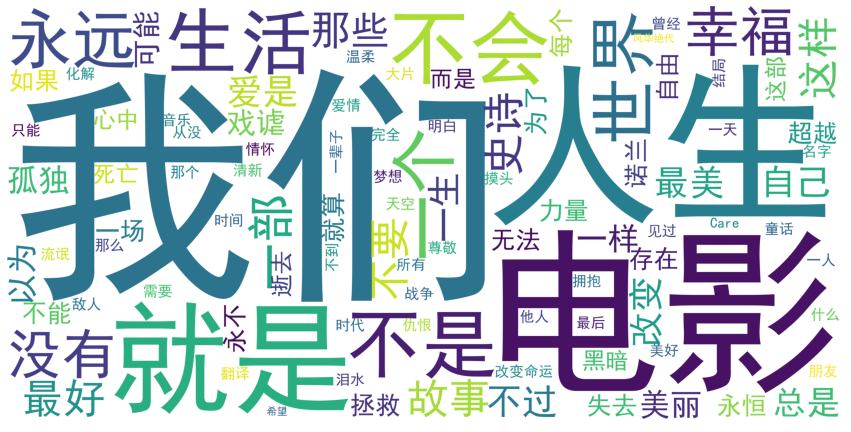

In [3]:
ls=[]
for word in words:
    if len(word)>1:
        ls.append(word)    #筛选出两个字以上的词组
txt=" ".join(ls)  
wd=WordCloud(mode="RGBA",max_font_size=120,margin=1,background_color="white",max_words=100,scale=10,font_path ='simhei.ttf')
wd.generate(txt)   #生成词云图
plt.figure(figsize=(15,12))
plt.imshow(wd)     #展示生成的词云图
plt.axis("off")    #取消坐标轴
plt.savefig("D:\\pydata\\douban\\movie_word_cloud.jpg",dpi=600)    #保存图片到本地 
plt.show()
